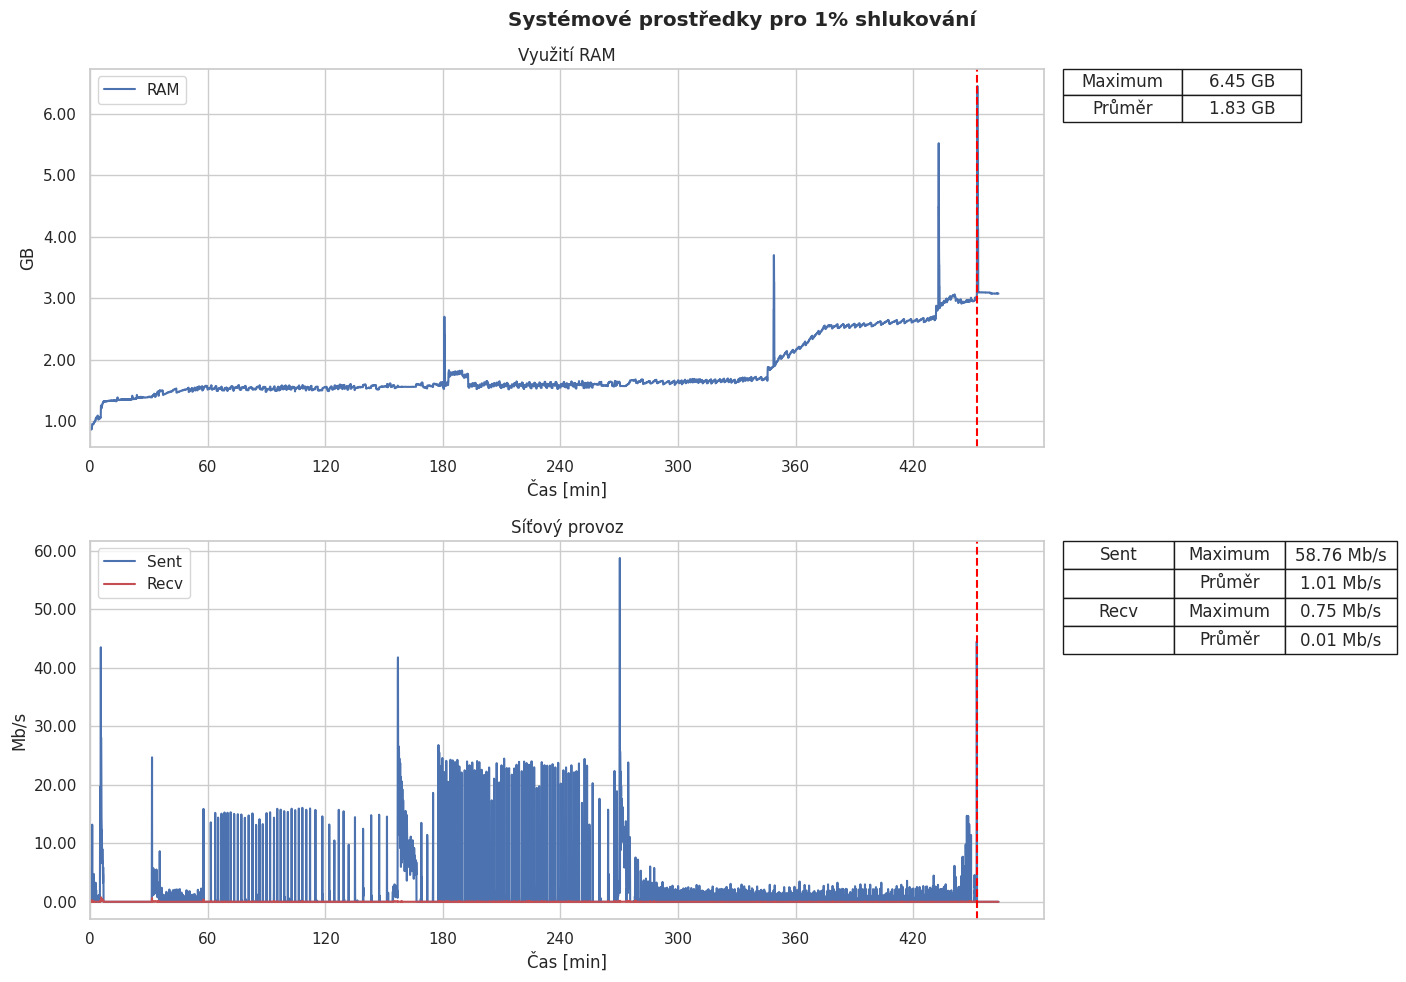

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Function to convert numbers to GB format
def to_gigabytes(x, _):
    return f"{(x / 1e9):.2f}"

# Function to convert numbers to Mb format
def to_megabytes(x, _):
    return f"{(x / 1e6):.2f}"

# br-d9dc76c093c8
# bd-bf30139838
# Load CSV file
data = pd.read_csv("1procento.csv", usecols=[
    #"timestamp",
    "used",
    "inactive",
    "br-d9dc76c093c8.bytes_recv_rate_per_sec",
    "br-d9dc76c093c8.bytes_sent_rate_per_sec",
    "user"
])
#data["timestamp"] = pd.to_datetime(data["timestamp"]).dt.strftime("%H:%M:%S")
# Set seaborn style
sns.set_theme(style="whitegrid")

tick_interval = 900
tick_locs = np.arange(0, len(data), tick_interval)
tick_labels = [f"{i * 60}" for i in range(0, len(tick_locs))]

#data["used"] = data["used"] - data["inactive"]

# Create plots
fig, axes = plt.subplots(2, 1, figsize=(15, 10))
fig.suptitle("Systémové prostředky pro 1% shlukování", fontweight="bold")

# Plot for RAM
sns.lineplot(data=data["used"], color="b", label="RAM", ax=axes[0])

axes[0].set_title("Využití RAM")
axes[0].set_xlabel("Čas [min]")
axes[0].set_xticks(tick_locs)
axes[0].set_xticklabels(tick_labels)
axes[0].set_ylabel("GB")
axes[0].set_xlim(0)
axes[0].yaxis.set_major_formatter(mticker.FuncFormatter(to_gigabytes))
#axes[0].xaxis.set_visible(False)
# 34084, 7915, 6790
axes[0].axvline(x=6790, color="red", linestyle="--")
axes[0].grid(True)

# Add table
peak, avg = data["used"].max(), data["used"].mean()
table = [
    ["Maximum", f"{to_gigabytes(peak, _)} GB"],
    ["Průměr", f"{to_gigabytes(avg, _)} GB"]
]
axes[0].table(cellText=table, cellLoc="center", bbox=[1.02, 0.86, 0.25, 0.14])

# Plot for Network
sentdata = data["br-d9dc76c093c8.bytes_sent_rate_per_sec"]
recvdata = data["br-d9dc76c093c8.bytes_recv_rate_per_sec"]

sns.lineplot(data=sentdata, color="b", label="Sent", ax=axes[1])
sns.lineplot(data=recvdata, color="r", label="Recv", ax=axes[1])

axes[1].set_title("Síťový provoz")
axes[1].set_xlabel("Čas [min]")
axes[1].set_xticks(tick_locs)
axes[1].set_xticklabels(tick_labels)
axes[1].set_ylabel("Mb/s")
axes[1].set_xlim(0)
axes[1].yaxis.set_major_formatter(mticker.FuncFormatter(to_megabytes))
#axes[1].xaxis.set_visible(False)
axes[1].axvline(x=6790, color="red", linestyle="--")
axes[1].grid(True)

# Add table
peak_sent, avg_sent = sentdata.max(), sentdata.mean()
peak_recv, avg_recv = recvdata.max(), recvdata.mean()
table = [
    ["Sent", "Maximum", f"{to_megabytes(peak_sent, _)} Mb/s"],
    ["", "Průměr", f"{to_megabytes(avg_sent, _)} Mb/s"],
    ["Recv", "Maximum", f"{to_megabytes(peak_recv, _)} Mb/s"],
    ["", "Průměr", f"{to_megabytes(avg_recv, _)} Mb/s"]
]
axes[1].table(cellText=table, cellLoc="center", bbox=[1.02, 0.7, 0.35, 0.3])

plt.legend(loc="upper left")
plt.tight_layout()
plt.show()
